# Drinking age with a scikit-learn model

This example uses the regression discontinuity design to make claims about the causal effects of the minimum legal drinking age (21 in the USA) upon all cause mortality rates. The dataset is from a study by {cite:t}`carpenter2009effect`.

In [1]:
from sklearn.linear_model import LinearRegression

import causalpy as cp

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
df = (
    cp.load_data("drinking")
    .rename(columns={"agecell": "age"})
    .assign(treated=lambda df_: df_.age > 21)
    .dropna(axis=0)
)

In [4]:
result = cp.RegressionDiscontinuity(
    df,
    formula="all ~ 1 + age + treated",
    running_variable_name="age",
    model=LinearRegression(),
    treatment_threshold=21,
)

## Examine results

/Users/benjamv/opt/mambaforge/envs/CausalPy/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/benjamv/opt/mambaforge/envs/CausalPy/lib/python3.11/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):
/Users/benjamv/opt/mambaforge/envs/CausalPy/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/benjamv/opt/mambaforge/envs/CausalPy/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib 

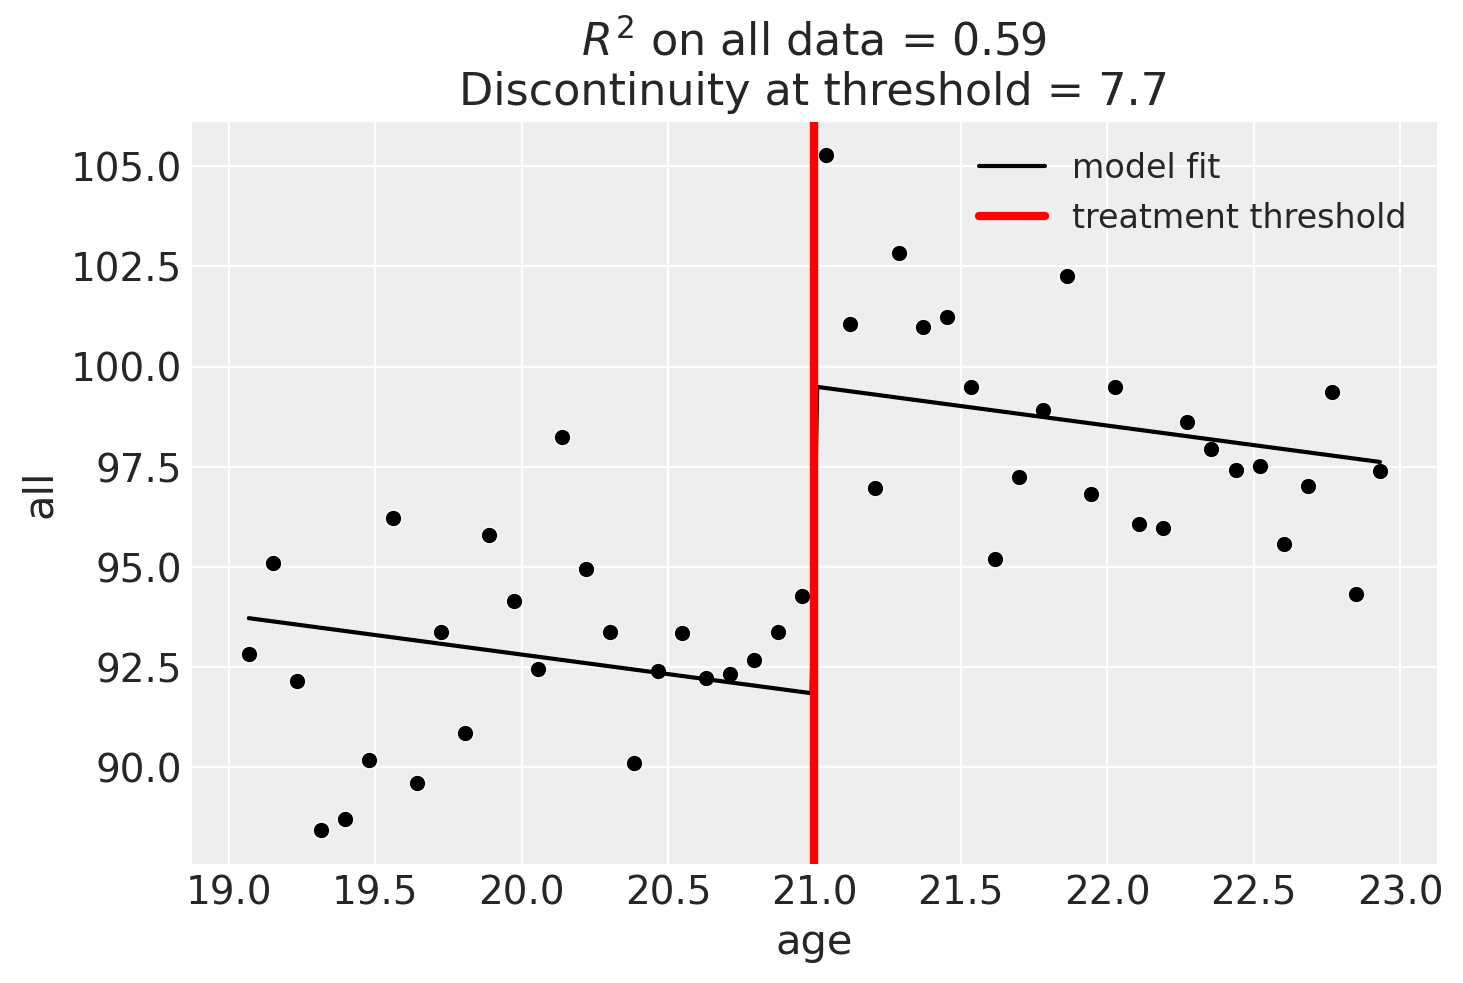

In [5]:
result.plot();

In [6]:
result.summary()

Difference in Differences experiment
Formula: all ~ 1 + age + treated
Running variable: age
Threshold on running variable: 21

Results:
Discontinuity at threshold = 7.66


Model coefficients:
  Intercept      	         0
  treated[T.True]	       7.7
  age            	     -0.97


## References
:::{bibliography}
:filter: docname in docnames
:::